## Phishing Website Detection using Machine Learning

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and reading the dataset

In [ ]:
data = pd.read_csv('phishing.csv')

#displaying the first 5 rows
data.head(5)


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
#displaying data in an easier manner to read
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Domain,graphicriver.net,ecnavi.jp,hubpages.com,extratorrent.cc,icicibank.com,nypost.com,kienthuc.net.vn,thenextweb.com,tobogo.net,akhbarelyom.com
Have_IP,0,0,0,0,0,0,0,0,0,0
Have_At,0,0,0,0,0,0,0,0,0,0
URL_Length,1,1,1,1,1,1,1,1,1,1
URL_Depth,1,1,1,3,3,4,2,6,2,5
Redirection,0,1,0,0,0,0,0,0,0,0
https_Domain,0,0,0,0,0,0,0,0,0,0
TinyURL,0,0,0,0,0,1,0,0,0,0
Prefix/Suffix,0,0,0,0,0,0,0,0,0,0
DNS_Record,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Displaying the shape of the data set

data.shape

(10000, 18)

In [ ]:
#Displaying a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## Data Preprocessing
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [ ]:
#Displaying a stastical summary of the dataset
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. This resulted in the decision to drop the  *'Domain'* column from the dataset.

In [ ]:
#Dropping the Domain column
data = data.drop(['Domain'], axis = 1).copy()

This leaves the dataset with 16 features & a target column.

In [ ]:
#Counting and checking for null values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

To have the same range of feature values while splitting the data into training & testing sets, we need to shuffle the data

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1,0,1
1,0,0,1,3,0,0,0,0,0,1,0,0,0,0,1,0,1
2,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0,0
3,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0,0
4,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
data['Label'].value_counts()

Label
1    5000
0    5000
Name: count, dtype: int64

**Quick observation**: The dataset has no null values. So further processing will not be done such as replace or deleting null rows. data is ready for traning, before training we visualise the data

## Visually Displaying data

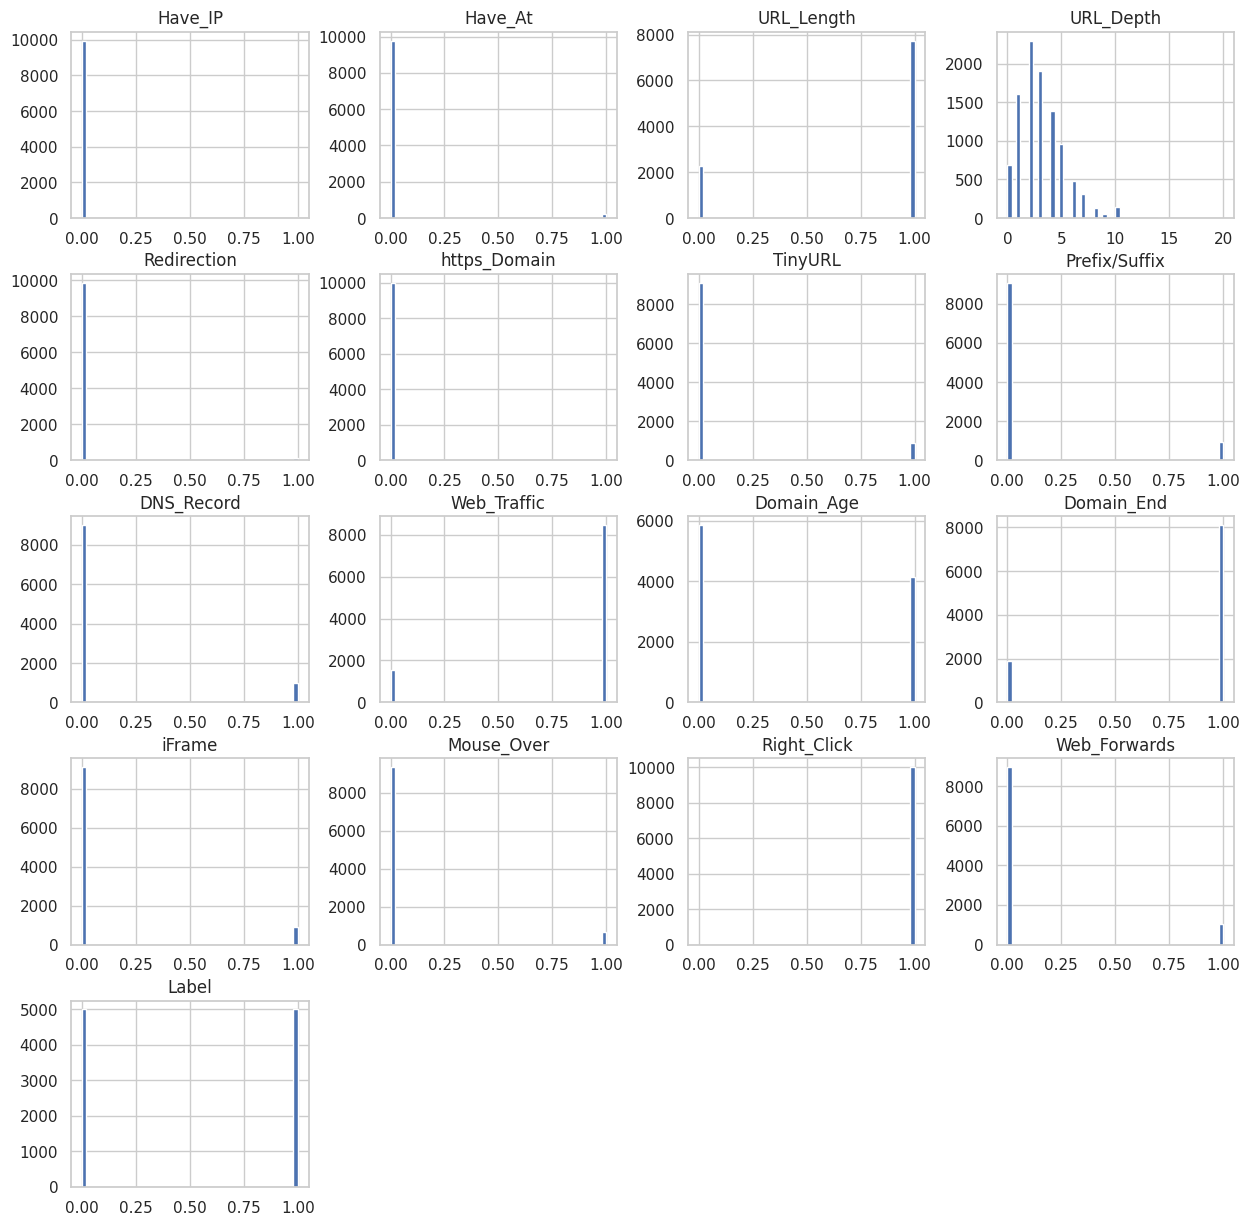

In [ ]:
#Plotting the data distribution with a histogram
data.hist(bins = 50,figsize = (15,15))
plt.show()

# Based on the insights from the histograms, the top 5 features that can be used for phishing detection are:
1. https_Domain: Indicates whether the URL uses 'https'.
2. Have_At: Checks for the presence of the '@' symbol in the URL.
3. Prefix/Suffix: Indicates the presence of a prefix or suffix separated by a '-' in the domain.
4. URL_Length: Measures the length of the URL.
5. Domain_Age: Measures the age of the domain

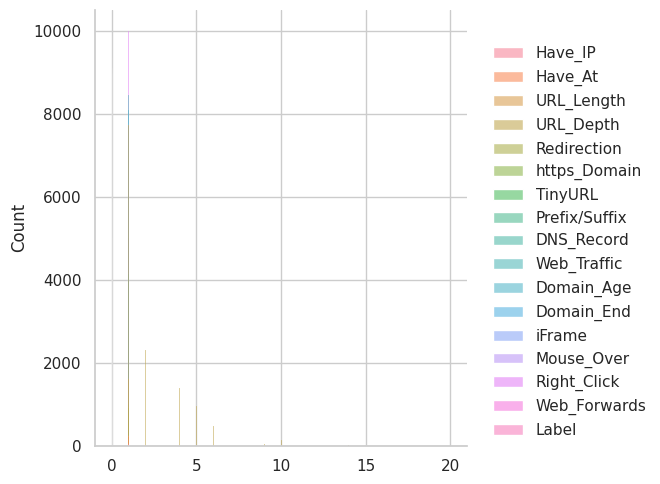

In [ ]:
#overall distribution of continuous data variables
plot = sns.displot(data)

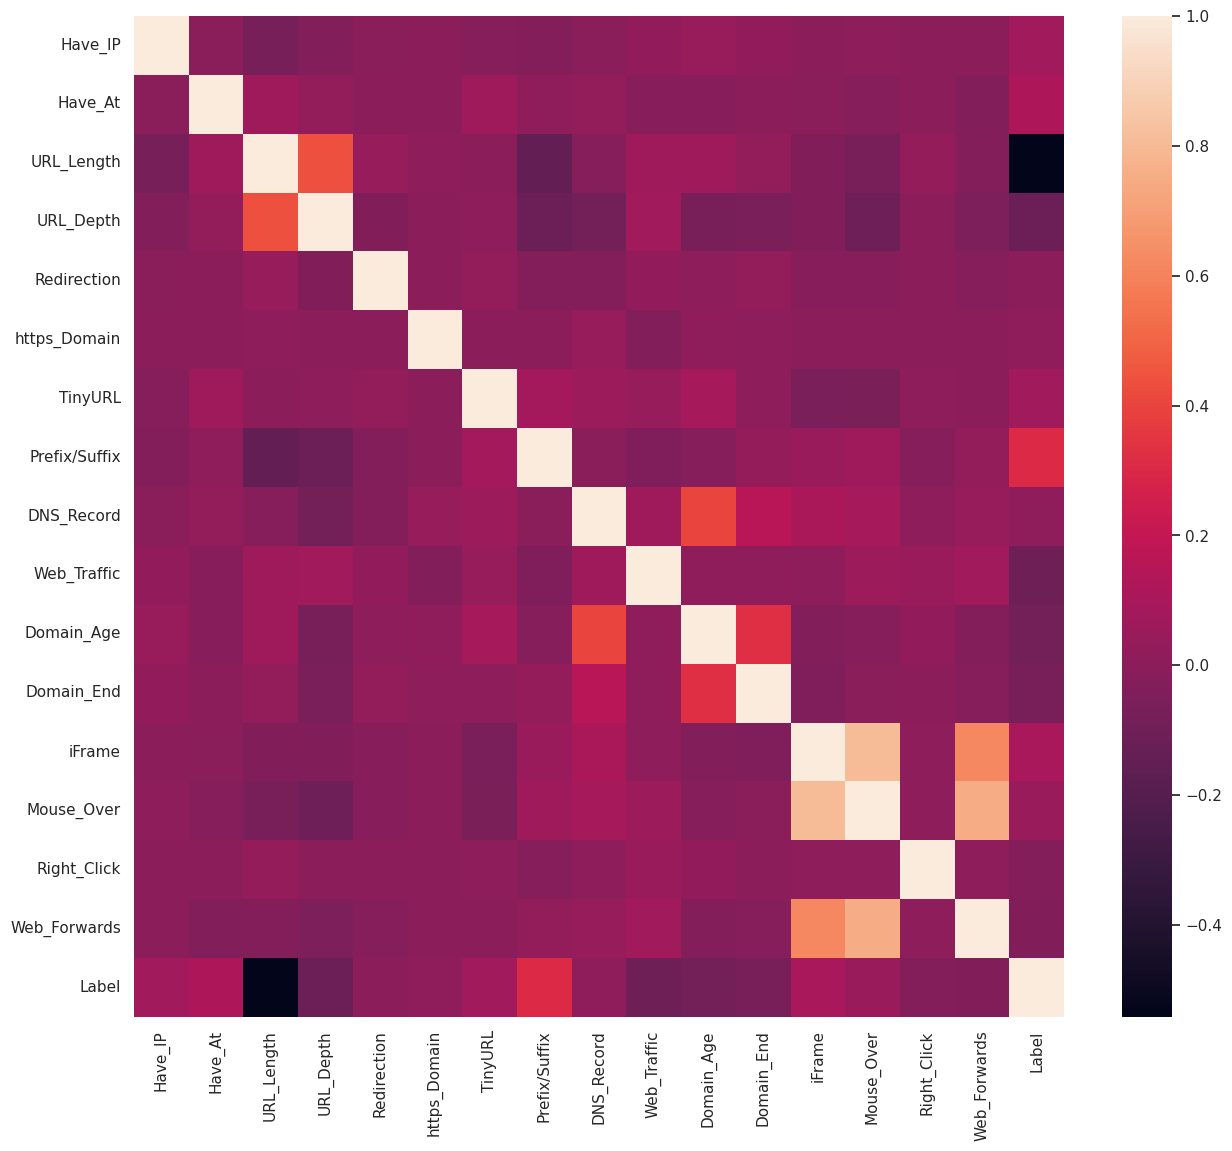

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

<Axes: >

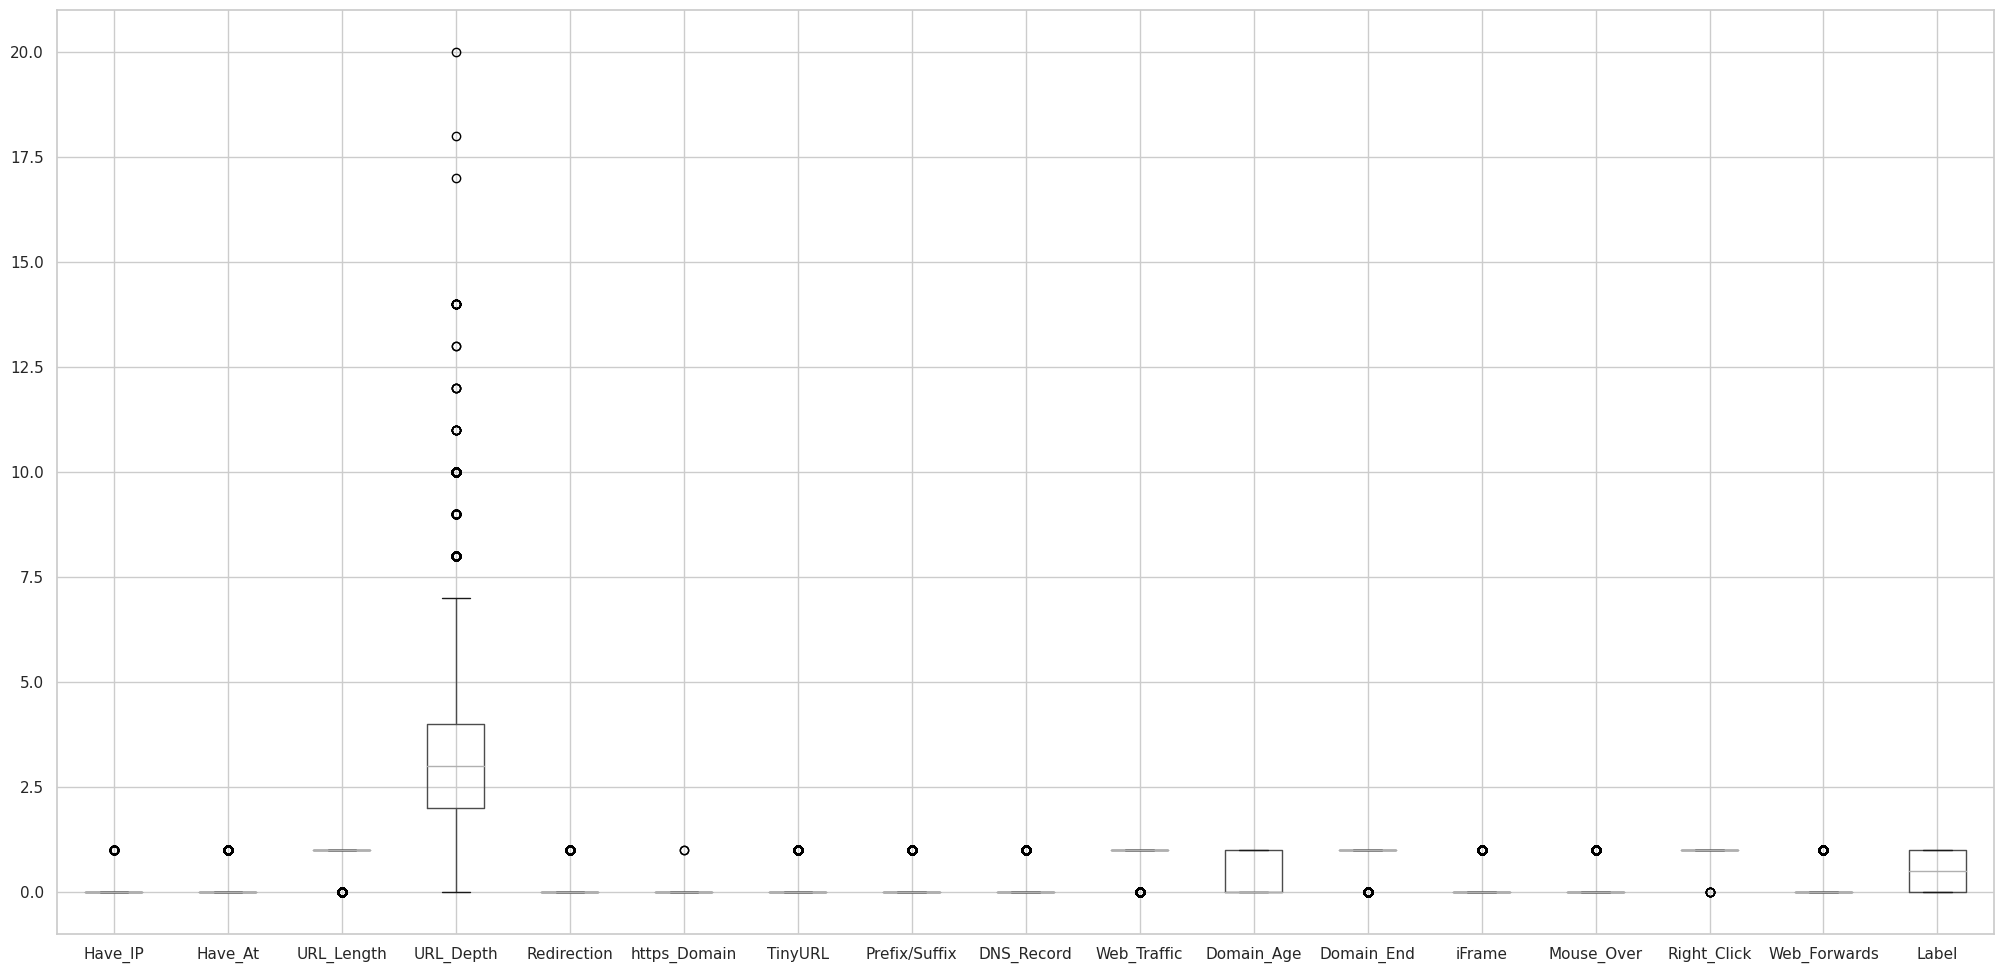

In [ ]:
sns.set(style="whitegrid")
data.boxplot(figsize=(25,12))

## Training and Testing
Now lets jump to training an dtesting the dataset generated.

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)

## Machine Learning Models

From the dataset above, We have learnt that this is a supervised machine learning.
This dataset uses a  classification problem,  it has input URL classified as phishing (1) or legitimate (0).
The supervised machine learning models (classification) considered to train the dataset in this notebook are:
    
* Decision Tree
* LogisticRegression
* RandomForestClassifiers
* XGBoost


In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## LOGISTIC REGRESSION

In [ ]:
# instantiate the model
model = LogisticRegression(max_iter=1000)
# fit the model
model.fit(X_train,np.ravel(y_train,order='C'))
#predicting the target value from the model for the samples
y_predict= model.predict(X_test)
y_train_model = model.predict(X_train)
y_test_model = model.predict(X_test)
model_score=model.score(X_test, y_test)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_model = accuracy_score(y_train,y_train_model)
acc_test_model = accuracy_score(y_test,y_test_model)

print("LogisticRegression: Accuracy on the Model: ",model_score)
print("LogisticRegression: Accuracy on training Data: {:.3f}".format(acc_train_model))
print("LogisticRegression: Accuracy on test Data: {:.3f}".format(acc_test_model))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

LogisticRegression: Accuracy on the Model:  0.811
LogisticRegression: Accuracy on training Data: 0.799
LogisticRegression: Accuracy on test Data: 0.811
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      1034
           1       0.91      0.67      0.77       966

    accuracy                           0.81      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.83      0.81      0.81      2000

[[972  62]
 [316 650]]


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('LogisticRegression', acc_train_model, acc_test_model)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

tree_score=model.score(X_test, y_test)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on the Model: ",tree_score)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

Decision Tree: Accuracy on the Model:  0.811
Decision Tree: Accuracy on training Data: 0.811
Decision Tree: Accuracy on test Data: 0.821
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      1034
           1       0.91      0.67      0.77       966

    accuracy                           0.81      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.83      0.81      0.81      2000

[[972  62]
 [316 650]]


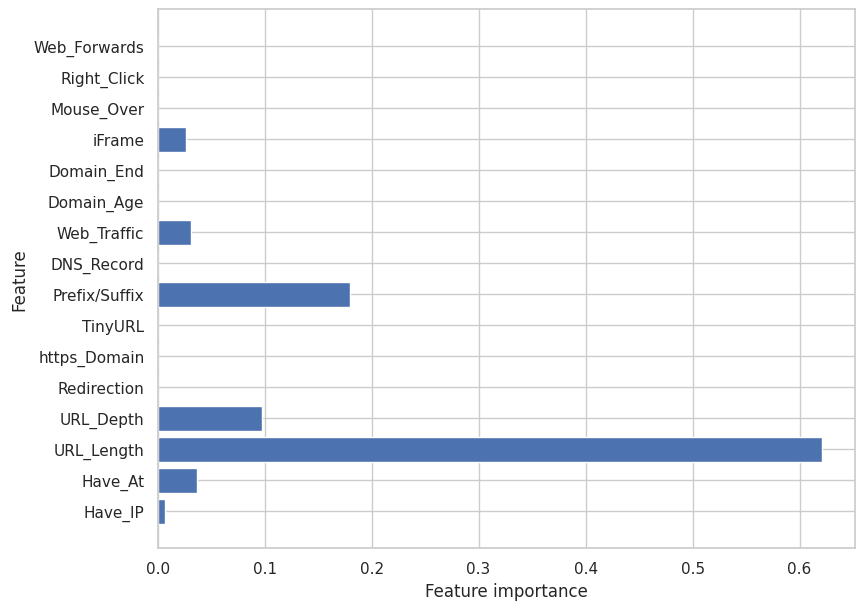

In [ ]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## Random Forest Classifier

In [ ]:
# instantiate the model
forest = RandomForestClassifier(max_depth=5)
# fit the model
forest.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
model_score=model.score(X_test, y_test)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on the Model: ",model_score)
print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

Random forest: Accuracy on the Model:  0.811
Random forest: Accuracy on training Data: 0.821
Random forest: Accuracy on test Data: 0.831
              precision    recall  f1-score   support

           0       0.75      0.94      0.84      1034
           1       0.91      0.67      0.77       966

    accuracy                           0.81      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.83      0.81      0.81      2000

[[972  62]
 [316 650]]


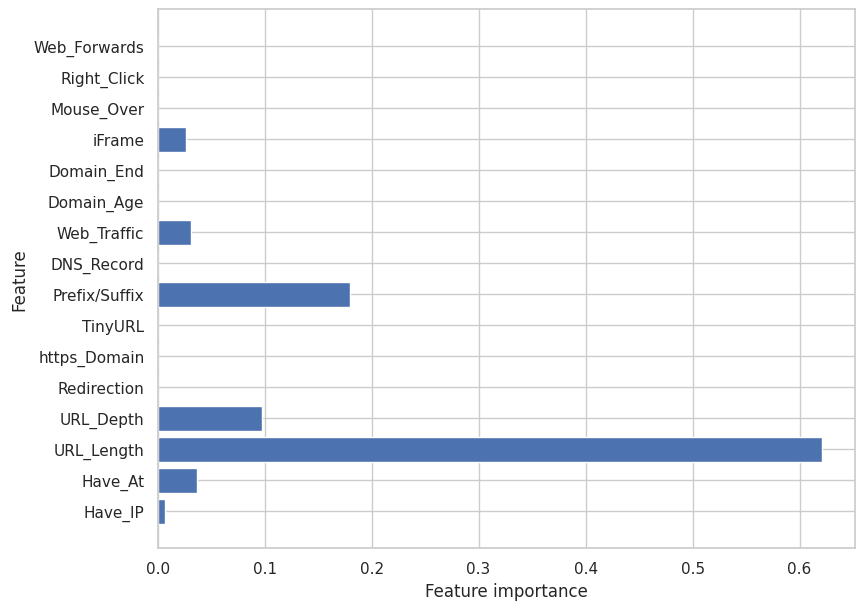

In [ ]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random forest', acc_train_forest, acc_test_forest)

## XGBoost Classifier

In [ ]:
# instantiate the model
xgb = XGBClassifier(use_label_encoder =False,learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)
model_score=xgb.score(X_test, y_test)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on the Model: ",model_score)
print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

XGBoost: Accuracy on the Model:  0.8675
XGBoost: Accuracy on training Data: 0.866
XGBoost : Accuracy on test Data: 0.868
              precision    recall  f1-score   support

           0       0.82      0.70      0.76      1034
           1       0.72      0.84      0.78       966

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000

[[720 314]
 [153 813]]


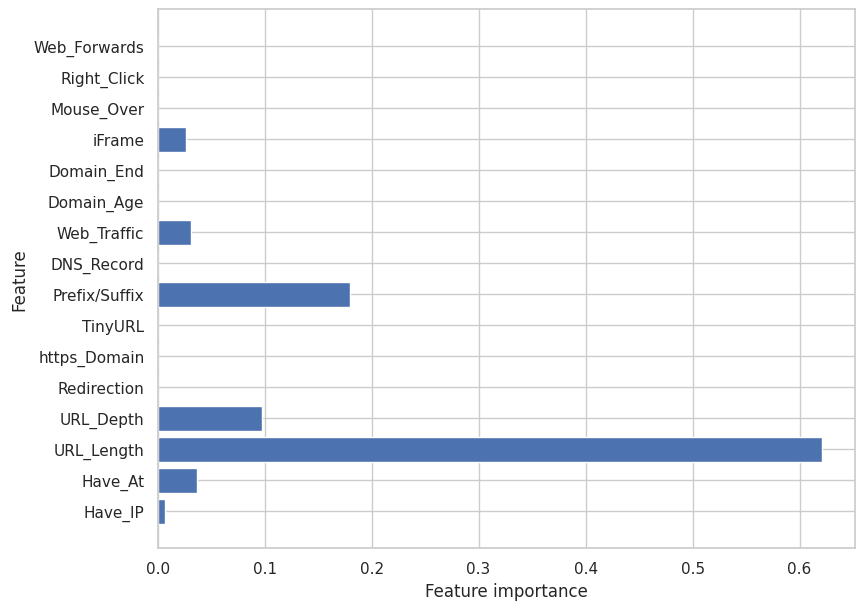

In [ ]:
#checking the feature importance in the model to highlight which features may be most relevant to the target
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,LogisticRegression,0.799,0.811
1,Decision Tree,0.811,0.821
2,Random forest,0.821,0.830
3,XGBoost,0.866,0.868


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.866,0.868
2,Random forest,0.821,0.830
1,Decision Tree,0.811,0.821
0,LogisticRegression,0.799,0.811


From the above comparision, it is clear that the XGBoost Classifier works well with this dataset. and can be used to further study the problem

now lets get into some advance stuff . lets add few more parameters to the dataste.



1.   The length of a URL can sometimes indicate whether it is phishing or legitimate. Phishing URLs often use very long or very short URLs to obscure their true nature.
2.   Phishing URLs often contain a higher number of special characters to create misleading links that appear similar to legitimate URLs or to evade detection.
3. Certain words are more likely to appear in phishing URLs because they are commonly used to lure users into providing sensitive information.




In [ ]:
import re

data = pd.read_csv("phishing.csv")


# Function to count special characters in the URL
def count_special_chars(url):
    return len(re.findall(r'[!@#$%^&*(),.?":{}|<>]', url))

# Function to check for suspicious words in the URL
def contains_suspicious_words(url):
    suspicious_words = ['login', 'bank', 'update', 'free', 'secure']
    return any(word in url.lower() for word in suspicious_words)

# Adding new features to the dataset
data['URL_Length_Category'] = pd.cut(data['URL_Length'], bins=[0, 20, 50, 100, float('inf')], labels=[0, 1, 2, 3])
data['Special_Char_Count'] = data['Domain'].apply(count_special_chars)
data['Suspicious_Words'] = data['Domain'].apply(contains_suspicious_words).astype(int)


In [ ]:
# Dropping the original 'Domain' column
data = data.drop(['Domain'], axis=1)

# Convert all columns to appropriate types
data = data.apply(pd.to_numeric, errors='ignore').fillna(-1).astype(float)

In [ ]:
# Separating features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Now tuning the XgBoost model since it gave the best result among all models

In [ ]:
# Enhanced parameter grid for XGBoost
param_grid_enhanced = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initializing the model
xgb = XGBClassifier(random_state=42)

# Initializing GridSearchCV with enhanced parameters
grid_search_enhanced = GridSearchCV(estimator=xgb, param_grid=param_grid_enhanced, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fitting the model
grid_search_enhanced.fit(X_train, y_train)

# Getting the best parameters
best_params_enhanced = grid_search_enhanced.best_params_
print(best_params_enhanced)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:

# Manually setting hyperparameters based on GridSearchCV results
xgb_best = XGBClassifier(**best_params_enhanced, random_state=42)

# Training the model with the best parameters
xgb_best.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_train = xgb_best.predict(X_train)
y_pred_test = xgb_best.predict(X_test)

# Evaluating the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

print("------------------------------")

print(metrics.classification_report(y_test, y_pred_test))
print(metrics.confusion_matrix(y_test, y_pred_test))

Training Accuracy: 0.901625
Testing Accuracy: 0.89
------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      1012
         1.0       0.96      0.81      0.88       988

    accuracy                           0.89      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.89      0.89      2000

[[976  36]
 [184 804]]


# this is possibly the best output i have got so far . lets take a chance and do tuning on the remaining models too.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize and tune the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)


# Evaluate the tuned model
logreg_train_accuracy = accuracy_score(y_train, best_logreg.predict(X_train))
logreg_test_accuracy = accuracy_score(y_test, best_logreg.predict(X_test))


print(f'Logistic Regression Training Accuracy: {logreg_train_accuracy}')
print(f'Logistic Regression Testing Accuracy: {logreg_test_accuracy}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Logistic Regression Training Accuracy: 0.84325
Logistic Regression Testing Accuracy: 0.8395


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize and tune the model
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Get the best estimator
best_dt = grid_search_dt.best_estimator_
print("Best parameters for Decision Tree:", best_dt.get_params())

# Evaluate the tuned model
dt_train_accuracy = accuracy_score(y_train, best_dt.predict(X_train))
dt_test_accuracy = accuracy_score(y_test, best_dt.predict(X_test))
print(f'Decision Tree Training Accuracy: {dt_train_accuracy}')
print(f'Decision Tree Testing Accuracy: {dt_test_accuracy}')


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Decision Tree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Decision Tree Training Accuracy: 0.90175
Decision Tree Testing Accuracy: 0.888


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize and tune the model
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", best_rf.get_params())

# Evaluate the tuned model
rf_train_accuracy = accuracy_score(y_train, best_rf.predict(X_train))
rf_test_accuracy = accuracy_score(y_test, best_rf.predict(X_test))
print(f'Random Forest Training Accuracy: {rf_train_accuracy}')
print(f'Random Forest Testing Accuracy: {rf_test_accuracy}')


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Random Forest: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Random Forest Training Accuracy: 0.899375
Random Forest Testing Accuracy: 0.8875


# Well i see that again after tuning also the output of XgBoost seems to be most accurate .

In [ ]:
from sklearn.model_selection import cross_val_score
# Performing cross-validation
cv_scores = cross_val_score(xgb_best, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())
print("Standard deviation of cross-validation score: ", cv_scores.std())

Cross-validation scores:  [0.8925 0.8865 0.8835 0.91   0.89  ]
Mean cross-validation score:  0.8924999999999998
Standard deviation of cross-validation score:  0.009268225288586833


#the cross-validation scores show that the XGBoost model is performing consistently well across different folds, with a mean accuracy of approximately 0.8925 and a standard deviation of 0.0093. This indicates that the model is robust and generalizes well to unseen data.

In [ ]:
import pandas as pd

# Create a dictionary to store the results
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Training Accuracy': [logreg_train_accuracy, dt_train_accuracy, rf_train_accuracy, train_accuracy],
    'Testing Accuracy': [logreg_test_accuracy, dt_test_accuracy, rf_test_accuracy, test_accuracy]
}

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results.sort_values(by=['Testing Accuracy'],ascending=False)


,Model,Training Accuracy,Testing Accuracy
3,XGBoost,0.901625,0.8900
1,Decision Tree,0.901750,0.8880
2,Random Forest,0.899375,0.8875
0,Logistic Regression,0.843250,0.8395


In [ ]:
with open('xgb_best_model.pkl', 'wb') as file:
    pickle.dump(xgb_best, file)

print("Model saved to xgb_best_model.pkl")

Model saved to xgb_best_model.pkl


**------------------------------------end of the project----------------------**